- 선형 회귀 분석 설명  
https://velog.io/@hyesoup/%EC%84%A0%ED%98%95-%ED%9A%8C%EA%B7%80-%EB%B6%84%EC%84%9DLinear-Regression-%EC%98%88%EC%A0%9C

- 다중 선형 회귀 분석 설명  
https://velog.io/@hyesoup/%EB%8B%A4%EC%A4%80%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80Multiple-Linear-Regression-%EC%98%88%EC%A0%9C

## 선형 회귀 분석

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./HeightWeight.csv')
del df['Index']
df = df.rename(columns={'Height(Inches)' : 'height'})
df = df.rename(columns={'Weight(Pounds)' : 'weight'})
df = df[:200]
df.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [3]:
df.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


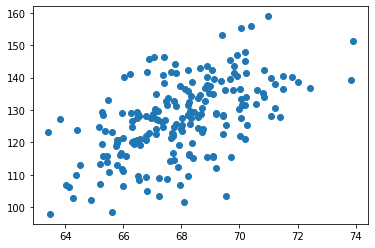

In [4]:
X = df['height']
y = df['weight']
plt.plot(X,y,'o')
plt.show()

In [5]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1),y)

LinearRegression()

In [6]:
line_fitter.predict([[70]])

array([134.25754957])

In [7]:
line_fitter.coef_

array([3.43166515])

In [8]:
line_fitter.intercept_

-105.95901104668266

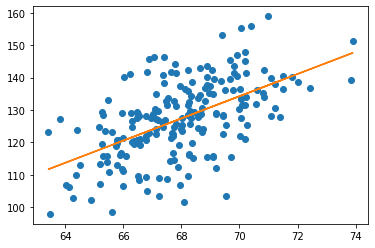

In [9]:
plt.plot(X,y,'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

## 다중 선형 회귀 분석

In [80]:
import pandas as pd

df = pd.read_csv('./manhattan.csv')
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [82]:
df = df.drop(['neighborhood', 'borough', 'rental_id'], axis = 1)

In [83]:
print(df.columns)

print(len(df.columns))

Index(['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')
15


In [86]:
from sklearn.model_selection import train_test_split

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym']]
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, 
                                                    test_size = 0.2)

In [87]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [90]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

In [92]:
my_apartment = [[1,1,620,16,1,98,1,0,1,0,0,1,1,0]]
my_predict = mlr.predict(my_apartment)
my_predict

array([[2496.77227938]])

In [93]:
y_predict = mlr.predict(x_test)

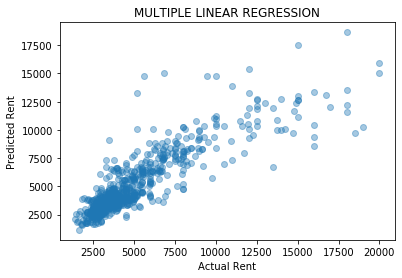

In [94]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('MULTIPLE LINEAR REGRESSION')
plt.show()

In [97]:
print(mlr.coef_)

[[-2.81820795e+02  1.13974829e+03  4.93545727e+00 -1.75145063e+01
   2.24568976e+01 -7.76772453e+00 -1.37824898e+02 -3.64835635e-01
   1.71405128e+02 -1.52180542e+02  7.13541316e+01  9.02749615e+00
  -6.25623793e+01 -1.55175311e+01]]


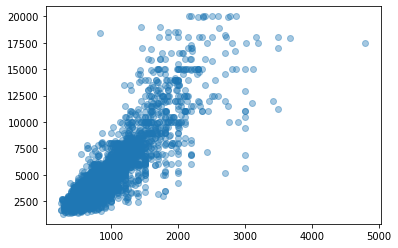

In [100]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['size_sqft']], df[['rent']], alpha = 0.4)
plt.show()

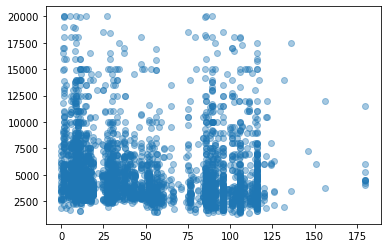

In [101]:
# 주택의 낙후도 'building_age_yrs'과 가격 'rent'
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha = 0.4)
plt.show()

In [103]:
((x_test-y_predict)**2).sum()

bedrooms            2.472830e+10
bathrooms           2.472877e+10
size_sqft           1.669786e+10
min_to_subway       2.470459e+10
floor               2.464563e+10
building_age_yrs    2.439034e+10
no_fee              2.473836e+10
has_roofdeck        2.473943e+10
has_washer_dryer    2.473954e+10
has_doorman         2.473863e+10
has_elevator        2.473853e+10
has_dishwasher      2.473923e+10
has_patio           2.474041e+10
has_gym             2.473943e+10
dtype: float64

In [104]:
mlr.score(x_train, y_train)

0.7856915600850256